In [28]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [29]:
# data
df = datasets.load_breast_cancer()
X, y = df.data, df.target
X.shape, y.shape

((569, 30), (569,))

In [30]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [32]:
X_train[0]

array([1.374e+01, 1.791e+01, 8.812e+01, 5.850e+02, 7.944e-02, 6.376e-02,
       2.881e-02, 1.329e-02, 1.473e-01, 5.580e-02, 2.500e-01, 7.574e-01,
       1.573e+00, 2.147e+01, 2.838e-03, 1.592e-02, 1.780e-02, 5.828e-03,
       1.329e-02, 1.976e-03, 1.534e+01, 2.246e+01, 9.719e+01, 7.259e+02,
       9.711e-02, 1.824e-01, 1.564e-01, 6.019e-02, 2.350e-01, 7.014e-02])

In [33]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
X_train[0]

array([-0.12348985, -0.29680142, -0.17050713, -0.20861569, -1.2016799 ,
       -0.7731696 , -0.76231194, -0.93324109, -1.22994935, -0.94816603,
       -0.53359339, -0.86028757, -0.61678096, -0.39177533, -1.35556152,
       -0.52503193, -0.4817033 , -0.97940018, -0.88459317, -0.68548672,
       -0.19761978, -0.5067476 , -0.30791001, -0.27357592, -1.50742388,
       -0.44926047, -0.57223884, -0.84082156, -0.8563616 , -0.76574773])

# all data are now in numpy array and type is double, convert to tensor, float32

In [35]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [36]:
X_train[0]

tensor([-0.1235, -0.2968, -0.1705, -0.2086, -1.2017, -0.7732, -0.7623, -0.9332,
        -1.2299, -0.9482, -0.5336, -0.8603, -0.6168, -0.3918, -1.3556, -0.5250,
        -0.4817, -0.9794, -0.8846, -0.6855, -0.1976, -0.5067, -0.3079, -0.2736,
        -1.5074, -0.4493, -0.5722, -0.8408, -0.8564, -0.7657])

# both y vals are 1d array, we want to convert them to 2d array where each val is in an array

In [37]:
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)
y_train.shape

torch.Size([398, 1])

In [38]:
# model
class Model(nn.Module): # nheriting from nn.Module
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1) # new layer - number of input features, ouotput
    # every nn.Module subclass must implement the forward method
    def forward(self, x):
        """
            Applies the sigmoid activation function to the output of the linear layer. 
            Sigmoid squashes the output values between 0 and 1, which is often used for 
            binary classification problems.
        """
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [42]:
model = Model(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [43]:
history = []
for epoch in range(100):
    #forward
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    history.append(loss.item())
    #backward pass
    loss.backward()
    #update
    optimizer.step()
    optimizer.zero_grad()

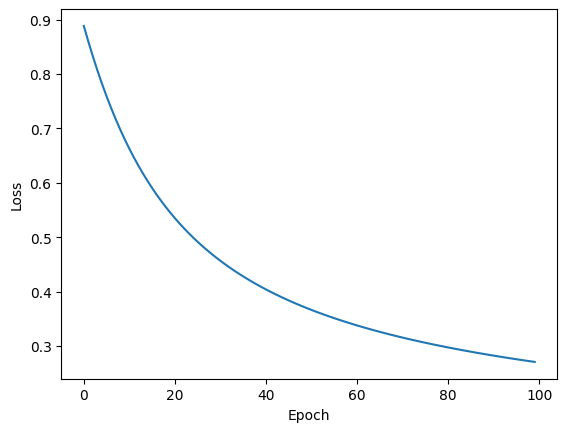

In [49]:
import matplotlib.pyplot as plt
plt.plot(range(100), history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [52]:
def to_bin(num):
    if num >= 0.5:
        return 1
    else:
        return 0

# Model will return tenor values that still has gradient values being calculated, so detach first, convert to numpy and then we can use them

In [53]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, [to_bin(n) for n in model(X_test).detach().numpy()])
print("Accuracy:", accuracy)


Accuracy: 0.9532163742690059
